# Scikit-Learn

## Sklearn 编程的一般步骤

### 数据加载

```python
from sklearn import datasets

digits = datasets.load_digits()

```

### 特征选择

```python

import numpy

```

### 数据清洗





### 模型选择

### 模型训练

```python
#将数据分成训练接和测试集
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(digits.data,digits.target,test_size = 0.2,random_state = 2)

#使用支持向量机来训练模型
from sklearn import svm
clf = svm.SVC(gamma = 0.001,C = 100.)
clf.fit(Xtrain,Ytrain)

```

### 模型测试
​
```python
clf.score(Xtest,Ytest)
```

### 模型的保存与加载

```python
# 保存模型为digits_svm.pkl
from sklearn.externals import joblib
joblib.dump(clf,'digits_svm.pkl')

# 导入模型参数
clf = joblib.load('digits_svm.pkl')
Ypred = clf.predict(Xtest)
clf.score(Ytest,Ypred)


```

## 线性回归


0.5482812185435971
0.43606903238180605
0.5356597030142565
0.736263899848181


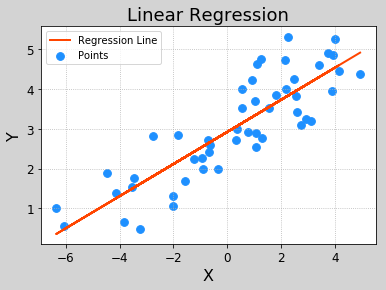

In [1]:
"""
线性回归
"""
import numpy as np
import sklearn.linear_model as lm
%matplotlib inline
import matplotlib.pyplot as mp
import sklearn.metrics as sm

x ,y = np.loadtxt('../ml_data/single.txt', 
	delimiter=',', usecols=(0,1), 
	unpack=True)
# 把x改为n行1列  这样才可以作为输入交给模型训练
x = x.reshape(-1, 1)
# 训练模型
model = lm.LinearRegression()
model.fit(x, y)
pred_y = model.predict(x)

# 评估回归模型的误差
# 平均绝对值误差  1/m∑|预测输出-真实输出|
print(sm.mean_absolute_error(y, pred_y))
# 平均平方误差  sqrt(1/m∑(预测输出-真实输出)^2)
print(sm.mean_squared_error(y, pred_y))
# 中位数绝对值误差  median(|预测输出-真实输出|)
print(sm.median_absolute_error(y, pred_y))
# r2得分 (0,1]的一个分值,分数越高,误差越小
print(sm.r2_score(y, pred_y))

mp.figure('Linear Regression', facecolor='lightgray')
mp.title('Linear Regression', fontsize=18)
mp.xlabel('X', fontsize=16)
mp.ylabel('Y', fontsize=16)
mp.tick_params(labelsize=12)
mp.grid(linestyle=':')
mp.scatter(x, y, s=60, c='dodgerblue', 
	label='Points')
mp.plot(x, pred_y, c='orangered', linewidth=2,
	label='Regression Line')
mp.legend()
mp.show()

## 岭回归


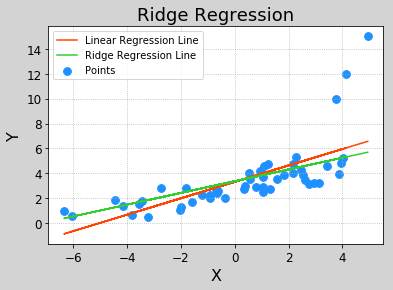

In [2]:
"""
岭回归
"""
import numpy as np
import sklearn.linear_model as lm
%matplotlib inline
import matplotlib.pyplot as mp
import sklearn.metrics as sm

x ,y = np.loadtxt('../ml_data/abnormal.txt', 
	delimiter=',', usecols=(0,1), 
	unpack=True)
# 把x改为n行1列  这样才可以作为输入交给模型训练
x = x.reshape(-1, 1)
mp.figure('Ridge Regression', facecolor='lightgray')
mp.title('Ridge Regression', fontsize=18)
mp.xlabel('X', fontsize=16)
mp.ylabel('Y', fontsize=16)
mp.tick_params(labelsize=12)
mp.grid(linestyle=':')
mp.scatter(x, y, s=60, c='dodgerblue', 
	label='Points')

# 使用线性回归, 绘制回归线
model = lm.LinearRegression()
model.fit(x, y)
pred_y = model.predict(x)
mp.plot(x, pred_y, c='orangered', 
		label='Linear Regression Line')

# 使用岭回归, 绘制回归线
model = lm.Ridge(150, fit_intercept=True, 
	    max_iter=1000)
model.fit(x, y)
pred_y = model.predict(x)
mp.plot(x, pred_y, c='limegreen', 
		label='Ridge Regression Line')


mp.legend()
mp.show()

## 多项式回归

0.4818952135901267
0.35240714067500106
0.47265950522390565
0.7868629092058498


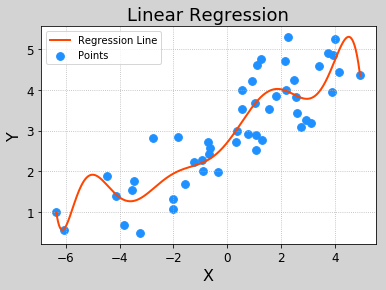

In [4]:
"""
多项式回归
"""
import numpy as np
import sklearn.linear_model as lm
%matplotlib inline
import matplotlib.pyplot as mp
import sklearn.metrics as sm
import sklearn.preprocessing as sp
import sklearn.pipeline as pl

x ,y = np.loadtxt('../ml_data/single.txt', 
	delimiter=',', usecols=(0,1), 
	unpack=True)
# 把x改为n行1列  这样才可以作为输入交给模型训练
x = x.reshape(-1, 1)
# 训练多项式回归模型
model = pl.make_pipeline(
	sp.PolynomialFeatures(10), 
	lm.LinearRegression()
)
model.fit(x, y)
pred_y = model.predict(x)
# 为了绘制多项式模型曲线, 构建1000个点
test_x = np.linspace(x.min(), x.max(), 1000)
test_x = test_x.reshape(-1, 1)
pred_test_y = model.predict(test_x)


# 评估回归模型的误差
# 平均绝对值误差  1/m∑|预测输出-真实输出|
print(sm.mean_absolute_error(y, pred_y))
# 平均平方误差  sqrt(1/m∑(预测输出-真实输出)^2)
print(sm.mean_squared_error(y, pred_y))
# 中位数绝对值误差  median(|预测输出-真实输出|)
print(sm.median_absolute_error(y, pred_y))
# r2得分 (0,1]的一个分值,分数越高,误差越小
print(sm.r2_score(y, pred_y))

mp.figure('Linear Regression', facecolor='lightgray')
mp.title('Linear Regression', fontsize=18)
mp.xlabel('X', fontsize=16)
mp.ylabel('Y', fontsize=16)
mp.tick_params(labelsize=12)
mp.grid(linestyle=':')
mp.scatter(x, y, s=60, c='dodgerblue', 
	label='Points')
mp.plot(test_x, pred_test_y, c='orangered', 
	linewidth=2, label='Regression Line')
mp.legend()
mp.show()

## 决策树

In [25]:
"""
demo07_house.py  预测房屋价格
"""
import sklearn.datasets as sd
import sklearn.utils as su
import sklearn.tree as st
import sklearn.metrics as sm


# 读取数据  加载波士顿房屋价格
boston = sd.load_boston()
print(boston.data.shape)	# 数据的维度
print(boston.feature_names) # 数据的特征名
print(boston.target.shape)

# 划分测试集与训练集
# 打乱数据集 
# 以random_state随机种子作为参数生成数据集
x, y=su.shuffle(boston.data, boston.target, 
				random_state=7)
train_size = int(len(x)*0.8)
train_x, test_x, train_y, test_y = \
    x[:train_size], x[train_size:], \
    y[:train_size], y[train_size:]

# 创建决策树回归器模型,使用训练集训练模型, 
# 测试集测试模型
model=st.DecisionTreeRegressor(max_depth=6)
model.fit(train_x, train_y)
pred_test_y = model.predict(test_x)
print(sm.r2_score(test_y, pred_test_y))




(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
(506,)
0.7466742766279562


In [6]:
"""
预测小汽车的等级
"""
import numpy as np
import sklearn.preprocessing as sp
import sklearn.ensemble as se
import sklearn.model_selection as ms

data = np.loadtxt('../ml_data/car.txt', 
	dtype='U20', delimiter=',')
data = data.T
encoders = []
train_x, train_y = [], []
for row in range(len(data)):
	# 创建适用于当前特征的标签编码器
	encoder = sp.LabelEncoder()
	if row < len(data)-1:
		train_x.append(
			encoder.fit_transform(data[row]))
	else:
		train_y = \
			encoder.fit_transform(data[row])
	encoders.append(encoder)
train_x = np.array(train_x).T

# 模型训练
model = se.RandomForestClassifier(max_depth=6, 
	n_estimators=200, random_state=7)
# 交叉验证
print(train_x.shape, train_y.shape)
score = ms.cross_val_score(model, train_x, 
	train_y, cv=4, scoring='f1_weighted')
print(score.mean())
model.fit(train_x, train_y)

# 自定义测试集  进行预测
data = [
['high','med','5more','4','big','low','unacc'],
['high','high','4','4','med','med','acc'],
['low','low','2','4','small','high','good'],
['low','med','3','4','med','high','vgood']]
# 训练时如何做的标签编码, 测试时需要使用相同的
# 标签编码器进行编码
data = np.array(data).T
test_x, test_y = [], []
for row in range(len(data)):
	encoder = encoders[row] # 得到标签编码器
	if row < len(data)-1:
		test_x.append(
			encoder.transform(data[row]))
	else:
		test_y = encoder.transform(data[row])
test_x = np.array(test_x).T
pred_test_y = model.predict(test_x)
enc = encoders[-1]
print(enc.inverse_transform(test_y))
print(enc.inverse_transform(pred_test_y))




(1728, 6) (1728,)


/home/liyuan3970/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.7465877061619401
['unacc' 'acc' 'good' 'vgood']
['unacc' 'acc' 'acc' 'vgood']


## 集合算法

### 正向激励（可以用来评估特征的重要性）

(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
(506,)
0.9068598725149652
[0.03339581 0.00287794 0.00810414 0.00099482 0.0463733  0.27796803
 0.00884059 0.11267449 0.02459319 0.05455562 0.05567394 0.0194009
 0.35454723]
0.8202560889408635


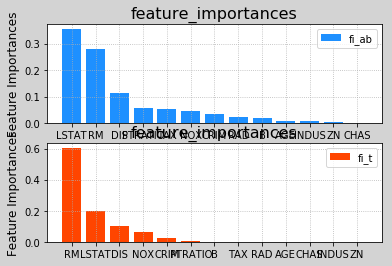

In [26]:
"""
demo01_adaboost.py  正向激励
"""
import sklearn.datasets as sd
import sklearn.utils as su
import sklearn.tree as st
import sklearn.ensemble as se
import sklearn.metrics as sm
import matplotlib.pyplot as mp
import numpy as np

# 读取数据  加载波士顿房屋价格
boston = sd.load_boston()
print(boston.data.shape)	# 数据的维度
print(boston.feature_names) # 数据的特征名
print(boston.target.shape)

# 划分测试集与训练集
# 打乱数据集 
# 以random_state随机种子作为参数生成数据集
x, y=su.shuffle(boston.data, boston.target, 
				random_state=7)
train_size = int(len(x)*0.8)
train_x, test_x, train_y, test_y = \
    x[:train_size], x[train_size:], \
    y[:train_size], y[train_size:]

# 创建决策树回归器模型,使用训练集训练模型, 
# 测试集测试模型
t_model=st.DecisionTreeRegressor(max_depth=4)
# 基于正向激励  搞出多颗树
model = se.AdaBoostRegressor(t_model, 
	n_estimators=400, random_state=7)
model.fit(train_x, train_y)
pred_test_y = model.predict(test_x)
print(sm.r2_score(test_y, pred_test_y))
fi_ab = model.feature_importances_
print(fi_ab)

# 使用决策树训练模型
model=st.DecisionTreeRegressor(max_depth=4)
model.fit(train_x, train_y)
pred_test_y = model.predict(test_x)
print(sm.r2_score(test_y, pred_test_y))
fi_t = model.feature_importances_


# 绘制特征重要性柱状图
mp.figure('feature_importances',facecolor='lightgray')
mp.subplot(211)
mp.title('feature_importances',fontsize=16)
mp.ylabel('Feature Importances', fontsize=12)
mp.grid(linestyle=':')
sorted_indices = fi_ab.argsort()[::-1]
x = np.arange(fi_ab.size)
mp.xticks(x, boston.feature_names[sorted_indices])
mp.bar(x, fi_ab[sorted_indices], 
	color='dodgerblue', label='fi_ab')
mp.legend()

mp.subplot(212)
mp.title('feature_importances',fontsize=16)
mp.ylabel('Feature Importances', fontsize=12)
mp.grid(linestyle=':')
sorted_indices = fi_t.argsort()[::-1]
x = np.arange(fi_t.size)
mp.xticks(x, boston.feature_names[sorted_indices])
mp.bar(x, fi_t[sorted_indices], 
	color='orangered', label='fi_t')
mp.legend()

mp.show()

### 自助聚合（随机深林）

0.8908932881244794
[0.06473878 0.29199954 0.02905222 0.00318817 0.01456185 0.00410101
 0.01700778 0.33751546 0.14432258 0.06218918 0.03132343]
['season' 'yr' 'mnth' 'holiday' 'weekday' 'workingday' 'weathersit' 'temp'
 'atemp' 'hum' 'windspeed']
0.9185017095863943
[0.02200502 0.08651628 0.00832898 0.64578449 0.0014351  0.00705077
 0.05966394 0.0165947  0.12040494 0.01357665 0.01599481 0.0026443 ]
['season' 'yr' 'mnth' 'hr' 'holiday' 'weekday' 'workingday' 'weathersit'
 'temp' 'atemp' 'hum' 'windspeed']


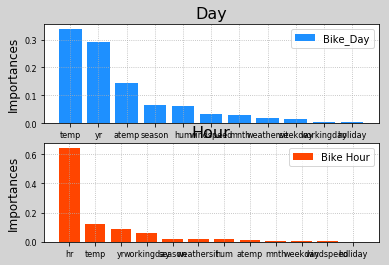

In [27]:
"""
共享单车案例   随机森林
"""
import numpy as np
import sklearn.utils as su
import sklearn.ensemble as se
import sklearn.metrics as sm
import matplotlib.pyplot as mp

data = np.loadtxt('../ml_data/bike_day.csv', 
	delimiter=',', unpack=False, 
	dtype='U20')
# 获取输入集与输出集
header = data[0, 2:13]
x = np.array(data[1:, 2:13], dtype=float)
y = np.array(data[1:, -1], dtype=float)
# 打乱数据集
x, y = su.shuffle(x, y, random_state=7)
# 拆分训练集,测试集
train_size = int(len(x)*0.9)
train_x, test_x, train_y, test_y = \
	x[:train_size], x[train_size:], \
	y[:train_size], y[train_size:]
# 随机森林模型训练
model=se.RandomForestRegressor(max_depth=10, 
	n_estimators=1000, min_samples_split=2)
model.fit(train_x, train_y)
pred_test_y = model.predict(test_x)
# 使用r2得分验证预测结果
print(sm.r2_score(test_y, pred_test_y))
# 输出特征重要性
fi_day = model.feature_importances_
print(fi_day)
print(header)

# 绘制特征重要性柱状图
mp.figure('Bike', facecolor='lightgray')
mp.subplot(211)
mp.title('Day', fontsize=16)
mp.ylabel('Importances', fontsize=12)
mp.tick_params(labelsize=8)
mp.grid(linestyle=':')
pos = np.arange(fi_day.size)
sorted_i = fi_day.argsort()[::-1]
mp.xticks(pos, header[sorted_i])
mp.bar(pos, fi_day[sorted_i], 
	   color='dodgerblue', label='Bike_Day')
mp.legend()


data = np.loadtxt('../ml_data/bike_hour.csv', 
	delimiter=',', unpack=False, 
	dtype='U20')
# 获取输入集与输出集
header = data[0, 2:14]
x = np.array(data[1:, 2:14], dtype=float)
y = np.array(data[1:, -1], dtype=float)
# 打乱数据集
x, y = su.shuffle(x, y, random_state=7)
# 拆分训练集,测试集
train_size = int(len(x)*0.9)
train_x, test_x, train_y, test_y = \
	x[:train_size], x[train_size:], \
	y[:train_size], y[train_size:]
# 随机森林模型训练
model=se.RandomForestRegressor(max_depth=10, 
	n_estimators=1000, min_samples_split=2)
model.fit(train_x, train_y)
pred_test_y = model.predict(test_x)
# 使用r2得分验证预测结果
print(sm.r2_score(test_y, pred_test_y))
# 输出特征重要性
fi_hour = model.feature_importances_
print(fi_hour)
print(header)

mp.subplot(212)
mp.title('Hour', fontsize=16)
mp.ylabel('Importances', fontsize=12)
mp.tick_params(labelsize=8)
mp.grid(linestyle=':')
pos = np.arange(fi_hour.size)
sorted_i = fi_hour.argsort()[::-1]
mp.xticks(pos, header[sorted_i])
mp.bar(pos, fi_hour[sorted_i], 
	   color='orangered', label='Bike Hour')
mp.legend()
mp.show()





















## 逻辑回归


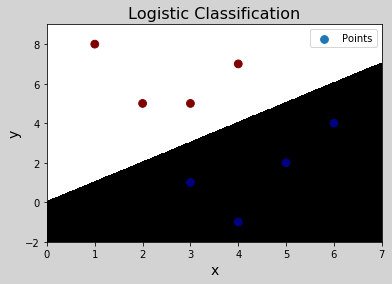

In [2]:
"""
逻辑分类  
"""
import numpy as np
%matplotlib inline
import matplotlib.pyplot as mp
import sklearn.linear_model as lm

x = np.array([
	[3, 1],
	[2, 5],
	[1, 8],
	[6, 4],
	[5, 2],
	[3, 5],
	[4, 7],
	[4, -1]])
y = np.array([0, 1, 1, 0, 0, 1, 1, 0])
# 把样本绘制出来
mp.figure('Logistic Classification', facecolor='lightgray')
mp.title('Logistic Classification', fontsize=16)
mp.xlabel('x', fontsize=14)
mp.ylabel('y', fontsize=14)
mp.tick_params(labelsize=10)
mp.grid(linestyle=':')

# 绘制分类边界线
l, r = x[:, 0].min()-1, x[:, 0].max()+1
b, t = x[:, 1].min()-1, x[:, 1].max()+1
n = 500
grid_x, grid_y = np.meshgrid(
	np.linspace(l, r, n),
	np.linspace(b, t, n))

# 构建逻辑分类器
model = lm.LogisticRegression(
	solver='liblinear', C=10)
model.fit(x, y)
# 把grid_x与grid_y抻平了组成模型的输入,预测输出
test_x = np.column_stack(
	(grid_x.ravel(), grid_y.ravel()))
pred_test_y = model.predict(test_x)
grid_z = pred_test_y.reshape(grid_x.shape)

mp.pcolormesh(grid_x,grid_y,grid_z,cmap='gray')

mp.scatter(x[:, 0], x[:, 1], s=60, c=y,
	marker='o', label='Points', cmap='jet')

mp.legend()
mp.show()





## 多元逻辑回归

/home/liyuan3970/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


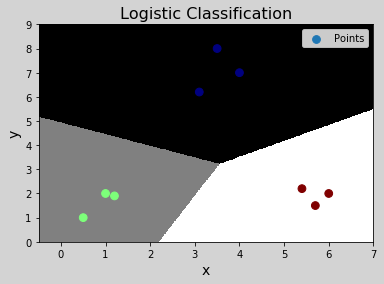

In [3]:
"""
demo06_mlc.py  多元逻辑分类  
"""
import numpy as np
import matplotlib.pyplot as mp
import sklearn.linear_model as lm

x = np.array([
	[4, 7],
	[3.5, 8],
	[3.1, 6.2],
	[0.5, 1],
	[1, 2],
	[1.2, 1.9],
	[6, 2],
	[5.7, 1.5],
	[5.4, 2.2]])
y = np.array([0, 0, 0, 1, 1, 1, 2, 2, 2])
# 把样本绘制出来
mp.figure('Logistic Classification', facecolor='lightgray')
mp.title('Logistic Classification', fontsize=16)
mp.xlabel('x', fontsize=14)
mp.ylabel('y', fontsize=14)
mp.tick_params(labelsize=10)
mp.grid(linestyle=':')

# 绘制分类边界线
l, r = x[:, 0].min()-1, x[:, 0].max()+1
b, t = x[:, 1].min()-1, x[:, 1].max()+1
n = 500
grid_x, grid_y = np.meshgrid(
	np.linspace(l, r, n),
	np.linspace(b, t, n))

# 构建逻辑分类器
model = lm.LogisticRegression(
	solver='liblinear', C=1000)
model.fit(x, y)
# 把grid_x与grid_y抻平了组成模型的输入,预测输出
test_x = np.column_stack(
	(grid_x.ravel(), grid_y.ravel()))
pred_test_y = model.predict(test_x)
grid_z = pred_test_y.reshape(grid_x.shape)

mp.pcolormesh(grid_x,grid_y,grid_z,cmap='gray')

mp.scatter(x[:, 0], x[:, 1], s=60, c=y,
	marker='o', label='Points', cmap='jet')

mp.legend()
mp.show()





## 贝叶斯定理

**贝叶斯公式:**
$$
P(A,B) = P(A)P(B|A) = P(B)P(A|B) \\
\Downarrow \Downarrow \Downarrow \\
P(A|B) = \frac{P(A)P(B|A)}{P(B)}
$$

例如:

假设一个学校中有60%男生和40%女生. 女生穿裤子的人数和穿裙子的人数相等. 所有男生都穿裤子. 一人在远处随机看到了一个穿裤子的学生, 那么这个学生是女生的概率是多少?

```
P(女) = 0.4
P(裤子|女) = 0.5
P(裤子) = 0.8
P(女|裤子) = P(女)*P(裤子|女)/P(裤子)
          = 0.4 * 0.5 / 0.8 = 0.25
```

(400, 3) float64


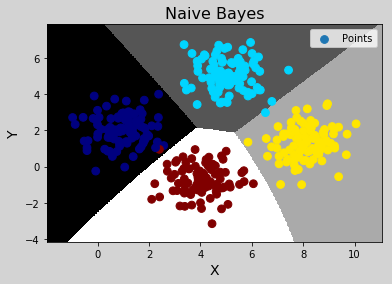

In [2]:
"""
朴素贝叶斯分类
"""
import numpy as np
import sklearn.naive_bayes as nb
%matplotlib inline
import matplotlib.pyplot as mp

data = np.loadtxt('../ml_data/multiple1.txt', 
	unpack=False, delimiter=',')
print(data.shape, data.dtype)
# 获取输入与输出
x = np.array(data[:, :-1])
y = np.array(data[:, -1])

# 绘制这些点, 点的颜色即是点的类别
mp.figure('Naive Bayes', facecolor='lightgray')
mp.title('Naive Bayes', fontsize=16)
mp.xlabel('X', fontsize=14)
mp.ylabel('Y', fontsize=14)
mp.tick_params(labelsize=10)
# 通过样本数据,训练朴素贝叶斯分类模型
model = nb.GaussianNB()
model.fit(x, y)
# 绘制分类边界线
l, r = x[:, 0].min()-1, x[:, 0].max()+1
b, t = x[:, 1].min()-1, x[:, 1].max()+1
n = 500
grid_x, grid_y = np.meshgrid(
	np.linspace(l, r, n),
	np.linspace(b, t, n))
test_x = np.column_stack(
	(grid_x.ravel(), grid_y.ravel()))
pred_test_y = model.predict(test_x)
grid_z = pred_test_y.reshape(grid_x.shape)
mp.pcolormesh(grid_x,grid_y,grid_z,cmap='gray')


mp.scatter(x[:,0], x[:,1], s=60, c=y, 
	cmap='jet', label='Points')
mp.legend()
mp.show()





(400, 3) float64
CV Accuracy: [1.         1.         1.         1.         0.98305085]
0.99


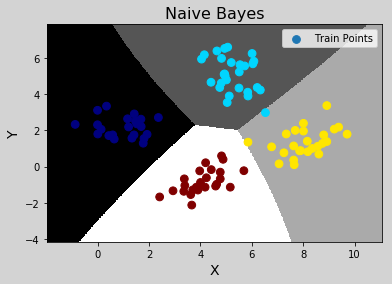

In [11]:
"""
demo08_ms.py  训练集测试集划分
"""
import numpy as np
import sklearn.naive_bayes as nb
import matplotlib.pyplot as mp
import sklearn.model_selection as ms

data = np.loadtxt('../ml_data/multiple1.txt', 
	unpack=False, delimiter=',')
print(data.shape, data.dtype)
# 获取输入与输出
x = np.array(data[:, :-1])
y = np.array(data[:, -1])

# 绘制这些点, 点的颜色即是点的类别
mp.figure('Naive Bayes', facecolor='lightgray')
mp.title('Naive Bayes', fontsize=16)
mp.xlabel('X', fontsize=14)
mp.ylabel('Y', fontsize=14)
mp.tick_params(labelsize=10)

# 训练集测试集划分
train_x, test_x, train_y, test_y = \
	ms.train_test_split(
	x, y, test_size=0.25, random_state=7)
#, random_state=7

# 通过训练样本,训练朴素贝叶斯分类模型
model = nb.GaussianNB()
# 到底用不用这个模型呢? 交叉验证看一下分数吧
score = ms.cross_val_score(
	model, train_x, train_y, cv=5, 
	scoring='accuracy')
print('CV Accuracy:', score)


model.fit(train_x, train_y)
# 对测试样本进行预测, 输出预测精确度
pred_test_y = model.predict(test_x)
# 精确度 = 预测正确的个数/总个数
print((test_y==pred_test_y).sum()/test_y.size)


# 绘制分类边界线
l, r = x[:, 0].min()-1, x[:, 0].max()+1
b, t = x[:, 1].min()-1, x[:, 1].max()+1
n = 500
grid_x, grid_y = np.meshgrid(
	np.linspace(l, r, n),
	np.linspace(b, t, n))
mesh_x = np.column_stack(
	(grid_x.ravel(), grid_y.ravel()))
pred_mesh_y = model.predict(mesh_x)
grid_z = pred_mesh_y.reshape(grid_x.shape)
mp.pcolormesh(grid_x,grid_y,grid_z,cmap='gray')


mp.scatter(test_x[:,0], test_x[:,1], s=60, 
	c=test_y, cmap='jet', label='Train Points')
mp.legend()
mp.show()

(400, 3) float64
CV Accuracy: 0.9966101694915255
CV PW: 0.996822033898305
CV RW: 0.9966101694915255
CV FW: 0.9966063988235516
[[22  0  0  0]
 [ 0 27  1  0]
 [ 0  0 25  0]
 [ 0  0  0 25]]
cr:               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        22
         1.0       1.00      0.96      0.98        28
         2.0       0.96      1.00      0.98        25
         3.0       1.00      1.00      1.00        25

   micro avg       0.99      0.99      0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



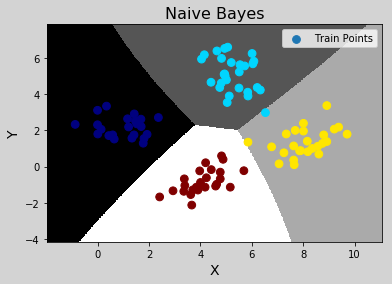

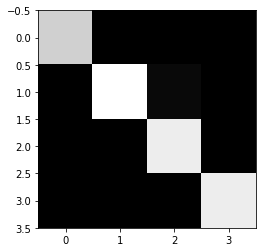

In [3]:
"""
交叉验证指标
"""
import numpy as np
import sklearn.naive_bayes as nb
%matplotlib inline
import matplotlib.pyplot as mp
import sklearn.model_selection as ms
import sklearn.metrics as sm

data = np.loadtxt('../ml_data/multiple1.txt', 
	unpack=False, delimiter=',')
print(data.shape, data.dtype)
# 获取输入与输出
x = np.array(data[:, :-1])
y = np.array(data[:, -1])

# 绘制这些点, 点的颜色即是点的类别
mp.figure('Naive Bayes', facecolor='lightgray')
mp.title('Naive Bayes', fontsize=16)
mp.xlabel('X', fontsize=14)
mp.ylabel('Y', fontsize=14)
mp.tick_params(labelsize=10)

# 训练集测试集划分
train_x, test_x, train_y, test_y = \
	ms.train_test_split(
	x, y, test_size=0.25, random_state=7)

# 通过训练样本,训练朴素贝叶斯分类模型
model = nb.GaussianNB()
# 到底用不用这个模型呢? 交叉验证看一下分数吧
ac = ms.cross_val_score(
	model, train_x, train_y, cv=5, 
	scoring='accuracy')
print('CV Accuracy:', ac.mean())
pw = ms.cross_val_score(
	model, train_x, train_y, cv=5, 
	scoring='precision_weighted')
print('CV PW:', pw.mean())
rw = ms.cross_val_score(
	model, train_x, train_y, cv=5, 
	scoring='recall_weighted')
print('CV RW:', rw.mean())
fw = ms.cross_val_score(
	model, train_x, train_y, cv=5, 
	scoring='f1_weighted')
print('CV FW:', fw.mean())

model.fit(train_x, train_y)
# 对测试样本进行预测, 输出预测精确度
pred_test_y = model.predict(test_x)
# 精确度 = 预测正确的个数/总个数
# print((test_y==pred_test_y).sum()/test_y.size)
# 输出混淆矩阵
m = sm.confusion_matrix(test_y, pred_test_y)
print(m)
# 输出分类报告
cr = sm.classification_report(
		test_y, pred_test_y)
print('cr:',cr)

# 绘制分类边界线
l, r = x[:, 0].min()-1, x[:, 0].max()+1
b, t = x[:, 1].min()-1, x[:, 1].max()+1
n = 500
grid_x, grid_y = np.meshgrid(
	np.linspace(l, r, n),
	np.linspace(b, t, n))
mesh_x = np.column_stack(
	(grid_x.ravel(), grid_y.ravel()))
pred_mesh_y = model.predict(mesh_x)
grid_z = pred_mesh_y.reshape(grid_x.shape)
mp.pcolormesh(grid_x,grid_y,grid_z,cmap='gray')
mp.scatter(test_x[:,0], test_x[:,1], s=60, 
	c=test_y, cmap='jet', label='Train Points')
mp.legend()

mp.figure('CM')
mp.imshow(m, cmap='gray')

mp.show()





## 验证曲线

[0.70023525 0.71988843 0.71757629 0.75168369 0.71649751 0.73557266
 0.76042815 0.75349173 0.76042815 0.80855962]


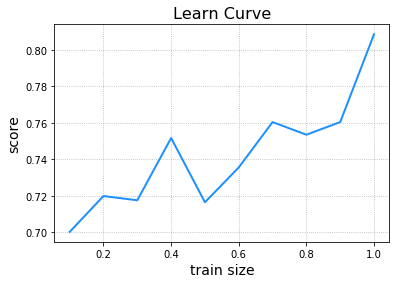

In [5]:
"""
学习曲线   
"""
import numpy as np
import sklearn.preprocessing as sp
import sklearn.ensemble as se
import sklearn.model_selection as ms
%matplotlib inline
import matplotlib.pyplot as mp

data = np.loadtxt('../ml_data/car.txt', 
	dtype='U20', delimiter=',')
data = data.T
encoders = []
train_x, train_y = [], []
for row in range(len(data)):
	# 创建适用于当前特征的标签编码器
	encoder = sp.LabelEncoder()
	if row < len(data)-1:
		train_x.append(
			encoder.fit_transform(data[row]))
	else:
		train_y = \
			encoder.fit_transform(data[row])
	encoders.append(encoder)
train_x = np.array(train_x).T


model = se.RandomForestClassifier(
	max_depth=9, n_estimators=150, 
	random_state=7)

# 验证学习曲线 获取最优训练集大小
train_sizes = np.linspace(0.1, 1, 10)
_, train_scores, test_scores=ms.learning_curve(
	model, train_x, train_y, 
	train_sizes=train_sizes, cv=5)
print(test_scores.mean(axis=1))

mp.figure('Learn Curve')
mp.title('Learn Curve', fontsize=16)
mp.xlabel('train size', fontsize=14)
mp.ylabel('score', fontsize=14)
mp.tick_params(labelsize=10)
mp.grid(linestyle=':')
mp.plot(train_sizes, test_scores.mean(axis=1),
	linewidth=2, c='dodgerblue')
mp.show()

## 支持向量机

              precision    recall  f1-score   support

         0.0       0.64      0.96      0.77        45
         1.0       0.75      0.20      0.32        30

   micro avg       0.65      0.65      0.65        75
   macro avg       0.70      0.58      0.54        75
weighted avg       0.69      0.65      0.59        75



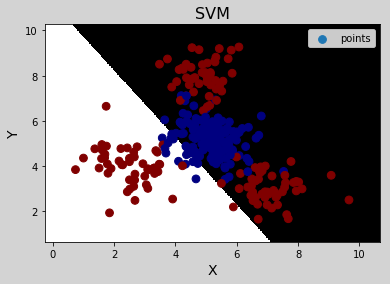

In [2]:
"""
支持向量机 线性核方法
"""
import numpy as np
import sklearn.model_selection as ms
import sklearn.svm as svm
import sklearn.metrics as sm
%matplotlib inline
import matplotlib.pyplot as mp

x, y = [],[]
data=np.loadtxt('../ml_data/multiple2.txt', 
	 delimiter=',')
x = data[:, :-1]
y = data[:, -1]
# 拆分训练集与测试集
train_x, test_x, train_y, test_y = \
	ms.train_test_split(x, y, test_size=0.25,
	random_state=5)
# 基于线性核函数的svm绘制分类边界
model=svm.SVC(kernel='linear')
model.fit(train_x, train_y)

# 绘制分类边界线
l, r = x[:, 0].min()-1, x[:, 0].max()+1
b, t = x[:, 1].min()-1, x[:, 1].max()+1
n = 500
grid_x, grid_y = np.meshgrid(
	np.linspace(l, r, n),
	np.linspace(b, t, n))
# 把grid_x与grid_y抻平了组成模型的输入,预测输出
mesh_x = np.column_stack(
	(grid_x.ravel(), grid_y.ravel()))
pred_mesh_y = model.predict(mesh_x)
grid_z = pred_mesh_y.reshape(grid_x.shape)

# 看一看测试集的分类报告
pred_test_y = model.predict(test_x)
cr = sm.classification_report(
	  	test_y, pred_test_y)
print(cr)

# 绘制这些点
mp.figure('SVM', facecolor='lightgray')
mp.title('SVM', fontsize=16)
mp.xlabel('X', fontsize=14)
mp.ylabel('Y', fontsize=14)
mp.tick_params(labelsize=10)
mp.pcolormesh(grid_x,grid_y,grid_z,cmap='gray')

mp.scatter(x[:,0], x[:,1], s=60, 
		c=y, label='points', cmap='jet')

mp.legend()
mp.show()










/home/liyuan3970/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

         0.0       0.91      0.87      0.89        45
         1.0       0.81      0.87      0.84        30

   micro avg       0.87      0.87      0.87        75
   macro avg       0.86      0.87      0.86        75
weighted avg       0.87      0.87      0.87        75



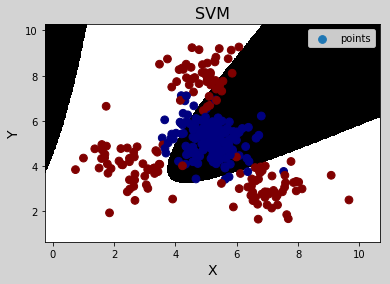

In [3]:
"""
支持向量机  多项式核函数
"""
import numpy as np
import sklearn.model_selection as ms
import sklearn.svm as svm
import sklearn.metrics as sm
import matplotlib.pyplot as mp

x, y = [],[]
data=np.loadtxt('../ml_data/multiple2.txt', 
	 delimiter=',')
x = data[:, :-1]
y = data[:, -1]
# 拆分训练集与测试集
train_x, test_x, train_y, test_y = \
	ms.train_test_split(x, y, test_size=0.25,
	random_state=5)
# 基于多项式核函数的svm绘制分类边界
model=svm.SVC(kernel='poly', degree=3)
model.fit(train_x, train_y)

# 绘制分类边界线
l, r = x[:, 0].min()-1, x[:, 0].max()+1
b, t = x[:, 1].min()-1, x[:, 1].max()+1
n = 500
grid_x, grid_y = np.meshgrid(
	np.linspace(l, r, n),
	np.linspace(b, t, n))
# 把grid_x与grid_y抻平了组成模型的输入,预测输出
mesh_x = np.column_stack(
	(grid_x.ravel(), grid_y.ravel()))
pred_mesh_y = model.predict(mesh_x)
grid_z = pred_mesh_y.reshape(grid_x.shape)

# 看一看测试集的分类报告
pred_test_y = model.predict(test_x)
cr = sm.classification_report(
	  	test_y, pred_test_y)
print(cr)

# 绘制这些点
mp.figure('SVM', facecolor='lightgray')
mp.title('SVM', fontsize=16)
mp.xlabel('X', fontsize=14)
mp.ylabel('Y', fontsize=14)
mp.tick_params(labelsize=10)
mp.pcolormesh(grid_x,grid_y,grid_z,cmap='gray')

mp.scatter(x[:,0], x[:,1], s=60, 
		c=y, label='points', cmap='jet')

mp.legend()
mp.show()


              precision    recall  f1-score   support

         0.0       0.98      0.91      0.94        45
         1.0       0.88      0.97      0.92        30

   micro avg       0.93      0.93      0.93        75
   macro avg       0.93      0.94      0.93        75
weighted avg       0.94      0.93      0.93        75



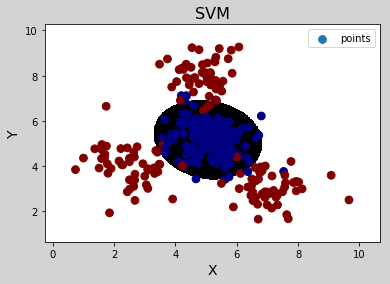

In [4]:
"""
支持向量机  径向基核函数
"""
import numpy as np
import sklearn.model_selection as ms
import sklearn.svm as svm
import sklearn.metrics as sm
import matplotlib.pyplot as mp

x, y = [],[]
data=np.loadtxt('../ml_data/multiple2.txt', 
	 delimiter=',')
x = data[:, :-1]
y = data[:, -1]
# 拆分训练集与测试集
train_x, test_x, train_y, test_y = \
	ms.train_test_split(x, y, test_size=0.25,
	random_state=5)
# 基于多项式核函数的svm绘制分类边界
model=svm.SVC(kernel='rbf', C=600, gamma=0.01)
model.fit(train_x, train_y)

# 绘制分类边界线
l, r = x[:, 0].min()-1, x[:, 0].max()+1
b, t = x[:, 1].min()-1, x[:, 1].max()+1
n = 500
grid_x, grid_y = np.meshgrid(
	np.linspace(l, r, n),
	np.linspace(b, t, n))
# 把grid_x与grid_y抻平了组成模型的输入,预测输出
mesh_x = np.column_stack(
	(grid_x.ravel(), grid_y.ravel()))
pred_mesh_y = model.predict(mesh_x)
grid_z = pred_mesh_y.reshape(grid_x.shape)

# 看一看测试集的分类报告
pred_test_y = model.predict(test_x)
cr = sm.classification_report(
	  	test_y, pred_test_y)
print(cr)

# 绘制这些点
mp.figure('SVM', facecolor='lightgray')
mp.title('SVM', fontsize=16)
mp.xlabel('X', fontsize=14)
mp.ylabel('Y', fontsize=14)
mp.tick_params(labelsize=10)
mp.pcolormesh(grid_x,grid_y,grid_z,cmap='gray')

mp.scatter(x[:,0], x[:,1], s=60, 
		c=y, label='points', cmap='jet')

mp.legend()
mp.show()


              precision    recall  f1-score   support

         0.0       0.29      0.76      0.42        42
         1.0       0.95      0.70      0.80       258

   micro avg       0.71      0.71      0.71       300
   macro avg       0.62      0.73      0.61       300
weighted avg       0.86      0.71      0.75       300



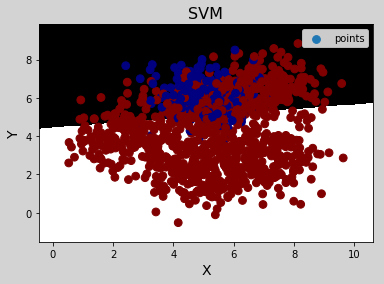

In [5]:
"""
样本类别均衡化
"""
import numpy as np
import sklearn.model_selection as ms
import sklearn.svm as svm
import sklearn.metrics as sm
import matplotlib.pyplot as mp

x, y = [],[]
data=np.loadtxt('../ml_data/imbalance.txt', 
	 delimiter=',')
x = data[:, :-1]
y = data[:, -1]
# 拆分训练集与测试集
train_x, test_x, train_y, test_y = \
	ms.train_test_split(x, y, test_size=0.25,
	random_state=5)
# 基于线性核函数的svm绘制分类边界
model=svm.SVC(kernel='linear', 
			  class_weight='balanced')
model.fit(train_x, train_y)

# 绘制分类边界线
l, r = x[:, 0].min()-1, x[:, 0].max()+1
b, t = x[:, 1].min()-1, x[:, 1].max()+1
n = 500
grid_x, grid_y = np.meshgrid(
	np.linspace(l, r, n),
	np.linspace(b, t, n))
# 把grid_x与grid_y抻平了组成模型的输入,预测输出
mesh_x = np.column_stack(
	(grid_x.ravel(), grid_y.ravel()))
pred_mesh_y = model.predict(mesh_x)
grid_z = pred_mesh_y.reshape(grid_x.shape)

# 看一看测试集的分类报告
pred_test_y = model.predict(test_x)
cr = sm.classification_report(
	  	test_y, pred_test_y)
print(cr)

# 绘制这些点
mp.figure('SVM', facecolor='lightgray')
mp.title('SVM', fontsize=16)
mp.xlabel('X', fontsize=14)
mp.ylabel('Y', fontsize=14)
mp.tick_params(labelsize=10)
mp.pcolormesh(grid_x,grid_y,grid_z,cmap='gray')

mp.scatter(x[:,0], x[:,1], s=60, 
		c=y, label='points', cmap='jet')

mp.legend()
mp.show()

## 置信概率

              precision    recall  f1-score   support

         0.0       0.98      0.91      0.94        45
         1.0       0.88      0.97      0.92        30

   micro avg       0.93      0.93      0.93        75
   macro avg       0.93      0.94      0.93        75
weighted avg       0.94      0.93      0.93        75

置信概率： [[3.00000090e-14 1.00000000e+00]
 [3.00000090e-14 1.00000000e+00]
 [9.72848869e-01 2.71511312e-02]
 [5.93713744e-01 4.06286256e-01]
 [3.90719513e-03 9.96092805e-01]
 [9.54414236e-11 1.00000000e+00]
 [9.44902150e-01 5.50978495e-02]]


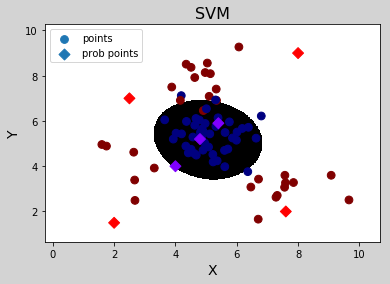

In [7]:
"""
demo09_proba.py  输出置信概率
"""
import numpy as np
import sklearn.model_selection as ms
import sklearn.svm as svm
import sklearn.metrics as sm
import matplotlib.pyplot as mp

x, y = [],[]
data=np.loadtxt('../ml_data/multiple2.txt', 
	 delimiter=',')
x = data[:, :-1]
y = data[:, -1]
# 拆分训练集与测试集
train_x, test_x, train_y, test_y = \
	ms.train_test_split(x, y, test_size=0.25,
	random_state=5)
# 基于多项式核函数的svm绘制分类边界
model=svm.SVC(kernel='rbf', C=600, gamma=0.01,
	probability=True)
model.fit(train_x, train_y)

# 绘制分类边界线
l, r = x[:, 0].min()-1, x[:, 0].max()+1
b, t = x[:, 1].min()-1, x[:, 1].max()+1
n = 500
grid_x, grid_y = np.meshgrid(
	np.linspace(l, r, n),
	np.linspace(b, t, n))
# 把grid_x与grid_y抻平了组成模型的输入,预测输出
mesh_x = np.column_stack(
	(grid_x.ravel(), grid_y.ravel()))
pred_mesh_y = model.predict(mesh_x)
grid_z = pred_mesh_y.reshape(grid_x.shape)

# 看一看测试集的分类报告
pred_test_y = model.predict(test_x)
cr = sm.classification_report(
	  	test_y, pred_test_y)
print(cr)

# 绘制这些点
mp.figure('SVM', facecolor='lightgray')
mp.title('SVM', fontsize=16)
mp.xlabel('X', fontsize=14)
mp.ylabel('Y', fontsize=14)
mp.tick_params(labelsize=10)
mp.pcolormesh(grid_x,grid_y,grid_z,cmap='gray')
mp.scatter(test_x[:,0], test_x[:,1], s=60, 
		c=test_y, label='points', cmap='jet')


# 整理测试样本 , 绘制每个样本的置信概率
prob_x = np.array([
	[2, 1.5], 
	[8, 9], 
	[4.8, 5.2], 
	[4, 4], 
	[2.5, 7], 
	[7.6, 2], 
	[5.4, 5.9]])
pred_prob_y = model.predict(prob_x)
probs = model.predict_proba(prob_x)
print('置信概率：',probs)
mp.scatter(prob_x[:,0], prob_x[:,1], s=60,
		marker='D', 
		c=pred_prob_y, label='prob points', 
		cmap='rainbow')

mp.legend()
mp.show()


## 网格搜索

/home/liyuan3970/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/liyuan3970/anaconda3/lib/python3.7/si

最佳参数 {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
最好得分 0.96
最佳评估 SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94        45
         1.0       0.90      0.93      0.92        30

   micro avg       0.93      0.93      0.93        75
   macro avg       0.93      0.93      0.93        75
weighted avg       0.93      0.93      0.93        75



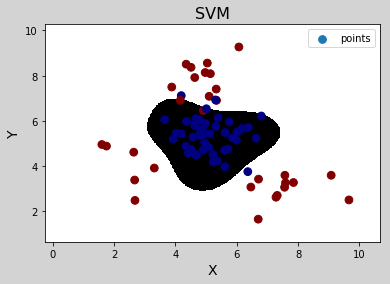

In [9]:
"""
网格搜索
"""
import numpy as np
import sklearn.model_selection as ms
import sklearn.svm as svm
import sklearn.metrics as sm
import matplotlib.pyplot as mp

x, y = [],[]
data=np.loadtxt('../ml_data/multiple2.txt', 
	 delimiter=',')
x = data[:, :-1]
y = data[:, -1]
# 拆分训练集与测试集
train_x, test_x, train_y, test_y = \
	ms.train_test_split(x, y, test_size=0.25,
	random_state=5)
# 基于svm绘制分类边界
model=svm.SVC()
# 使用网格搜索,获取最优模型超参数
params = [
  {'kernel':['linear'],'C':[1,10,100,1000]},
  {'kernel':['poly'],'C':[1],'degree':[2,3]},
  {'kernel':['rbf'],'C':[1,10,100,1000], 
    'gamma':[1, 0.1, 0.01, 0.001]}]
model = ms.GridSearchCV(model, params, cv=5)
model.fit(train_x, train_y)

print('最佳参数',model.best_params_)
print('最好得分',model.best_score_)
print('最佳评估',model.best_estimator_)


# 绘制分类边界线
l, r = x[:, 0].min()-1, x[:, 0].max()+1
b, t = x[:, 1].min()-1, x[:, 1].max()+1
n = 500
grid_x, grid_y = np.meshgrid(
	np.linspace(l, r, n),
	np.linspace(b, t, n))
# 把grid_x与grid_y抻平了组成模型的输入,预测输出
mesh_x = np.column_stack(
	(grid_x.ravel(), grid_y.ravel()))
pred_mesh_y = model.predict(mesh_x)
grid_z = pred_mesh_y.reshape(grid_x.shape)

# 看一看测试集的分类报告
pred_test_y = model.predict(test_x)
cr = sm.classification_report(
	  	test_y, pred_test_y)
print(cr)

# 绘制这些点
mp.figure('SVM', facecolor='lightgray')
mp.title('SVM', fontsize=16)
mp.xlabel('X', fontsize=14)
mp.ylabel('Y', fontsize=14)
mp.tick_params(labelsize=10)
mp.pcolormesh(grid_x,grid_y,grid_z,cmap='gray')
mp.scatter(test_x[:,0], test_x[:,1], s=60, 
		c=test_y, label='points', cmap='jet')

mp.legend()
mp.show()



## SVM事件预测

In [11]:
"""
demo11_event.py 事件预测
"""
import numpy as np
import sklearn.preprocessing as sp
import sklearn.model_selection as ms
import sklearn.svm as svm

# 模仿LabelEncoder的接口 设计数字编码器
class DigitEncoder():

    def fit_transform(self, y):
        return y.astype(int)

    def transform(self, y):
    	return y.astype(int)

    def inverse_transform(self, y):
    	return y.astype(str)

data = np.loadtxt('../ml_data/events.txt', 
       delimiter=',', dtype='U20')
# 转置后删掉1列
data = np.delete(data.T, 1, axis=0)
# 整理训练集
encoders, x = [], [] 
for row in range(len(data)):
	# 选择编码器, 如果是数字,则用自定义编码器
	if data[row][0].isdigit():
		encoder = DigitEncoder()
	else:
		encoder = sp.LabelEncoder()

	encoders.append(encoder)

	if row < len(data)-1: 
		x.append(
    		encoder.fit_transform(data[row]))
	else:
		y = encoder.fit_transform(data[row])

x = np.array(x).T
# 拆分训练集与测试集
train_x, test_x, train_y, test_y = \
    ms.train_test_split(x, y, test_size=0.25,
	random_state=7)
# 选择模型, 开始训练
model = svm.SVC(kernel='rbf', 
			    class_weight='balanced')
model.fit(train_x, train_y)
pred_test_y = model.predict(test_x)
# 输出精确度
print((pred_test_y==test_y).sum()/test_y.size)


# 模拟接收参数: 预测输入  从而预测输出
data = [['Monday','13:30:00','22','31']]
data = np.array(data).T
x = []
for row in range(len(data)):
	encoder = encoders[row]
	x.append(encoder.transform(data[row]))
x = np.array(x).T
pred_y = model.predict(x)
print(encoders[-1].inverse_transform(pred_y))



0.6590909090909091
['eventA']


/home/liyuan3970/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [12]:
"""
支持向量机
"""
import numpy as np
import sklearn.preprocessing as sp
import sklearn.model_selection as ms
import sklearn.svm as svm
import sklearn.metrics as sm

class DigitEncoder():

    def fit_transform(self, y):
        return y.astype(int)

    def transform(self, y):
    	return y.astype(int)

    def inverse_transform(self, y):
    	return y.astype(str)

data = np.loadtxt('../ml_data/traffic.txt', 
	delimiter=',', dtype='U20')
data = data.T
encoders, x = [], []
for row in range(len(data)):
	if data[row][0].isdigit():
		encoder = DigitEncoder()
	else:
		encoder = sp.LabelEncoder()
	encoders.append(encoder)
	# 整理输入集
	if row < len(data)-1:
		x.append(
			encoder.fit_transform(data[row]))
	else:
		y = encoder.fit_transform(data[row])
# 整理数据集
x = np.array(x).T
# 拆分测试集 训练集 
train_x, test_x, train_y, test_y = \
    ms.train_test_split(x, y, test_size=0.25, 
	random_state=7)
# 创建模型, 模型训练
model = svm.SVR(kernel='rbf', C=10)
model.fit(train_x, train_y)
pred_test_y = model.predict(test_x)
print(sm.r2_score(test_y, pred_test_y))

# 结果预测
data=[['Tuesday','13:35','San Francisco','yes']]
data = np.array(data).T

x = []
for row in range(len(data)):
	encoder = encoders[row]
	x.append(encoder.transform(data[row]))
x = np.array(x).T
pred_y = model.predict(x)
print(int(pred_y))

/home/liyuan3970/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.6478692163198654
22


## 聚类

### K均值
第一步: 随机选择K个样本作为K个聚类中心, 计算每个样本到各个聚类中心的欧式距离, 将该样本分配到与之距离最近的聚类中心所在的类别中.

第二步: 根据第一步得到的聚类划分, 分别计算每个聚类所有样本的几何中心, 将几何中心作为新的聚类中心,重复第一步. 直到计算所得几何中心与聚类中心重合或接近重合为止.

[[5.91196078 2.04980392]
 [3.1428     5.2616    ]
 [1.831      1.9998    ]
 [7.07326531 5.61061224]]


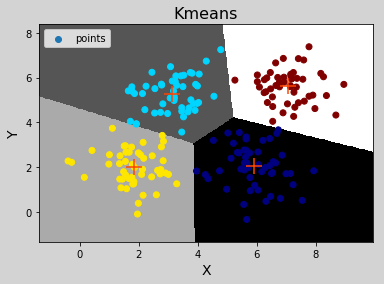

In [13]:
"""
k均值算法
"""
import numpy as np
import sklearn.cluster as sc
import matplotlib.pyplot as mp

x = np.loadtxt('../ml_data/multiple3.txt', 
	delimiter=',')
# KMeans聚类
model = sc.KMeans(n_clusters=4)
model.fit(x)
centers = model.cluster_centers_
print(centers)
pred_y = model.predict(x)
# 划分聚类边界
l, r = x[:, 0].min()-1, x[:, 0].max()+1
b, t = x[:, 1].min()-1, x[:, 1].max()+1
n = 500
grid_x, grid_y = np.meshgrid(
	np.linspace(l, r, n),
	np.linspace(b, t, n))
mesh_x = np.column_stack((grid_x.ravel(), 
	grid_y.ravel()))
pred_mesh_y = model.predict(mesh_x)
grid_z = pred_mesh_y.reshape(grid_x.shape)

mp.figure('Kmeans', facecolor='lightgray')
mp.title('Kmeans', fontsize=16)
mp.xlabel('X',fontsize=14)
mp.ylabel('Y',fontsize=14)
mp.tick_params(labelsize=10)
mp.pcolormesh(grid_x,grid_y,grid_z,cmap='gray')
mp.scatter(x[:,0], x[:,1], c=pred_y, cmap='jet',
		label='points')
# 绘制聚类中心点
mp.scatter(centers[:,0], centers[:,1],
	marker='+', s=230, c='orangered')
mp.legend()
mp.show()


## Kmeans的图像向量化
Kmeans聚类算法可以应用于图像量化领域. 通过KMeans算法可以把一张图像所包含的颜色值进行聚类划分. 得到划分后的聚类中心后, 把靠近某个聚类中的点的亮度值改为聚类中心值, 由此生成新的图片. 达到图像降维的目的. 这个过程称为图像量化.  

图像量化可以很好的保存图像的轮廓, 降低机器识别的难度.

/home/liyuan3970/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  # Remove the CWD from sys.path while we load stuff.


(262144,)
(2,) [ 58.845886 194.9759  ]


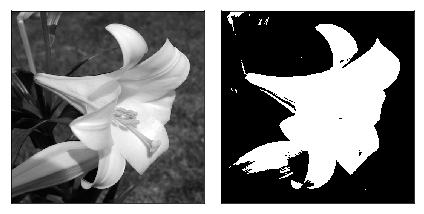

In [14]:
"""
图像量化  KMeans聚类
"""
import numpy as np
import scipy.misc as sm
import scipy.ndimage as sn
import sklearn.cluster as sc
import matplotlib.pyplot as mp

img = sm.imread('../ml_data/lily.jpg', True)
# 图像量化
x = img.reshape(-1, 1)
model = sc.KMeans(n_clusters=2)
model.fit(x)
y = model.labels_
print(y.shape)
# 把每个亮度值修改为相应的聚类中心值
centers = model.cluster_centers_.ravel()
print(centers.shape, centers)
# 使用numpy的掩码操作 修改y数组的每个值
result = centers[y].reshape(img.shape)
mp.figure('Image')
mp.subplot(121)
mp.xticks([])
mp.yticks([])
mp.imshow(img, cmap='gray')
mp.subplot(122)
mp.xticks([])
mp.yticks([])
mp.imshow(result, cmap='gray')
mp.tight_layout()
mp.show()




#### 均值漂移算法

首先嘉定样本空间中的每个聚类均服从某种已知的概率分布规则, 然后用不同的概率密度函数拟合样本中的统计直方图, 不断移动密度函数的中心位置, 直到获得最佳拟合效果为止.这些概率密度函数的峰值点就是聚类的中心, 再根据每个样本距离各个中心的距离, 选择最近的聚类中心所属的类别作为该样本的类别.

均值漂移算法的特点:

1. 聚类数不必事先已知, 算法会自动识别出统计直方图的中心数量.
2. 聚类中心不依据于最初假定, 聚类划分的结果相对稳定.
3. 样本空间应该服从某种概率分布规则, 某则算法的准确性将会大打折扣.

均值漂移相关的API:

```python
# x: 输入 n_samples: 样本数量
# quantile: 量化宽度 (直方图一条的宽度)
bw = sc.estimate_bandwidth(
    x, n_samples=len(x), quantile=0.1)
# 构建均值漂移模型
model = sc.MeanShift(bandwidth=bw)
```

[[3.07897959 5.15326531]
 [6.9823913  5.59804348]
 [5.868      2.21622222]
 [1.97733333 2.00644444]]


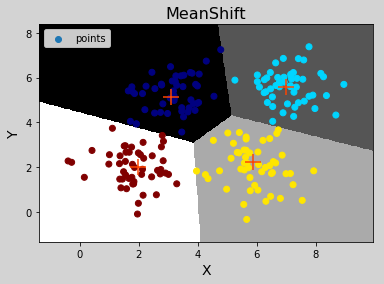

In [15]:
"""
均值漂移
"""
import numpy as np
import sklearn.cluster as sc
import matplotlib.pyplot as mp

x = np.loadtxt('../ml_data/multiple3.txt', 
	delimiter=',')

# 均值漂移实现聚类划分

bw = sc.estimate_bandwidth(
	x, n_samples=len(x), quantile=0.2)
model = sc.MeanShift(bandwidth=bw)

model.fit(x)
centers = model.cluster_centers_
print(centers)
pred_y = model.predict(x)
# 划分聚类边界
l, r = x[:, 0].min()-1, x[:, 0].max()+1
b, t = x[:, 1].min()-1, x[:, 1].max()+1
n = 500
grid_x, grid_y = np.meshgrid(
	np.linspace(l, r, n),
	np.linspace(b, t, n))
mesh_x = np.column_stack((grid_x.ravel(), 
	grid_y.ravel()))
pred_mesh_y = model.predict(mesh_x)
grid_z = pred_mesh_y.reshape(grid_x.shape)

mp.figure('MeanShift', facecolor='lightgray')
mp.title('MeanShift', fontsize=16)
mp.xlabel('X',fontsize=14)
mp.ylabel('Y',fontsize=14)
mp.tick_params(labelsize=10)
mp.pcolormesh(grid_x,grid_y,grid_z,cmap='gray')
mp.scatter(x[:,0], x[:,1], c=pred_y, cmap='jet',
		label='points')
# 绘制聚类中心点
mp.scatter(centers[:,0], centers[:,1],
	marker='+', s=230, c='orangered')
mp.legend()
mp.show()

#### 凝聚层次算法

首先假定每个样本都是一个独立的聚类, 如果统计出来的聚类数大于期望的聚类数, 则从每个样本出发, 寻找离自己最近的另外一个样本, 与之聚集, 形成更大的聚类. 同时另总聚类数减少, 不断重复以上过程, 直到统计出来的聚类总数达到期望值为止.

凝聚层次算法的特点:

1. 凝聚数量必须事先已知. 可以借助于某些指标, 优选参数.
2. 没有聚类中心的概念, 因此只能在训练集中划分聚类, 但不能对训练集以外的未知样本确定其归属.
3. 在确定被凝聚样本时, 除了以距离作为条件以外, 还可以根据连续性来确定被聚集的样本.

凝聚层次相关API:

```python
# 构建凝聚层次聚类模型
model = sc.AgglomerativeClustering(
        n_clusters=4)
pred_y = model.fit_predict(x)
```

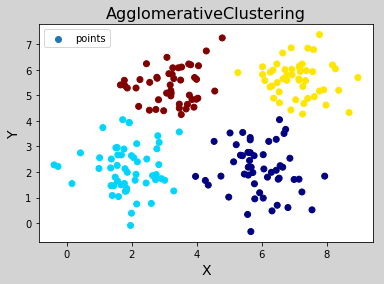

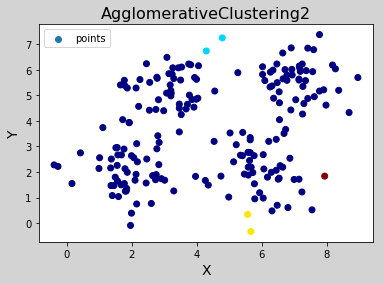

In [16]:
"""
凝聚层次算法
"""
import numpy as np
import sklearn.cluster as sc
import matplotlib.pyplot as mp
import sklearn.neighbors as nb

x = np.loadtxt('../ml_data/multiple3.txt', 
	delimiter=',')

# 凝聚层次实现聚类划分
model = sc.AgglomerativeClustering(
			n_clusters=4)
pred_y = model.fit_predict(x)

mp.figure('AgglomerativeClustering', facecolor='lightgray')
mp.title('AgglomerativeClustering', fontsize=16)
mp.xlabel('X',fontsize=14)
mp.ylabel('Y',fontsize=14)
mp.tick_params(labelsize=10)
mp.scatter(x[:,0], x[:,1], c=pred_y, cmap='jet',
		label='points')
mp.legend()


# 凝聚层次实现聚类划分 以连续性为条件
# 近邻筛选器
conn = nb.kneighbors_graph(
	   x, 10, include_self=False)
model = sc.AgglomerativeClustering(
			linkage='average',
			n_clusters=4, connectivity=conn)
pred_y = model.fit_predict(x)

mp.figure('AgglomerativeClustering2', facecolor='lightgray')
mp.title('AgglomerativeClustering2', fontsize=16)
mp.xlabel('X',fontsize=14)
mp.ylabel('Y',fontsize=14)
mp.tick_params(labelsize=10)
mp.scatter(x[:,0], x[:,1], c=pred_y, cmap='jet',
		label='points')
mp.legend()


mp.show()


#### 轮廓系数

轮廓系数用于评估一个聚类模型的性能. 一个好的聚类: 内密外疏. 同一个聚类内部的样本要足够密集, 不同聚类之间的样本要足够稀疏.

轮廓系数的计算规则: 针对样本空间中的一个特定样本, 计算它与所在聚类其它样本的平均距离a, 以及该样本与距离最近的另一个聚类中所有的样本的平均距离b. 那么该样本的轮廓系数为(b-a)/max(a,b).   若将整个样本空间中所有样本的轮廓系数取算数平均值, 就可以把该结果作为聚类划分的指标.

该公式结果处于:[-1, 1].  -1代表分类效果比较差, 1代表分类效果好. 0代表聚类重叠, 没有很好的划分聚类.

[[1.831      1.9998    ]
 [7.07326531 5.61061224]
 [5.91196078 2.04980392]
 [3.1428     5.2616    ]]
得分: 0.5773232071896658


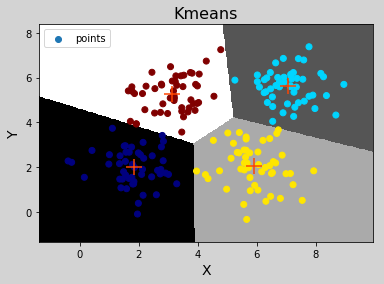

In [18]:
"""

轮廓系数
"""
import numpy as np
import sklearn.cluster as sc
import matplotlib.pyplot as mp
import sklearn.metrics as sm

x = np.loadtxt('../ml_data/multiple3.txt', 
	delimiter=',')
# KMeans聚类
model = sc.KMeans(n_clusters=4)
model.fit(x)
centers = model.cluster_centers_
print(centers)
pred_y = model.predict(x)
# 输出轮廓系数
score = sm.silhouette_score(x, pred_y, 
	sample_size=len(x), metric='euclidean')
print('得分:',score)

# 划分聚类边界
l, r = x[:, 0].min()-1, x[:, 0].max()+1
b, t = x[:, 1].min()-1, x[:, 1].max()+1
n = 500
grid_x, grid_y = np.meshgrid(
	np.linspace(l, r, n),
	np.linspace(b, t, n))
mesh_x = np.column_stack((grid_x.ravel(), 
	grid_y.ravel()))
pred_mesh_y = model.predict(mesh_x)
grid_z = pred_mesh_y.reshape(grid_x.shape)

mp.figure('Kmeans', facecolor='lightgray')
mp.title('Kmeans', fontsize=16)
mp.xlabel('X',fontsize=14)
mp.ylabel('Y',fontsize=14)
mp.tick_params(labelsize=10)
mp.pcolormesh(grid_x,grid_y,grid_z,cmap='gray')
mp.scatter(x[:,0], x[:,1], c=pred_y, cmap='jet',
		label='points')
# 绘制聚类中心点
mp.scatter(centers[:,0], centers[:,1],
	marker='+', s=230, c='orangered')
mp.legend()
mp.show()

#### DBSCAN算法

从样本空间中任意选择一个样本, 以事先给定的半径做圆. 凡是被该圆圈中的样本都视为与该样本处于同样的聚类. 以这些被圈中样本为圆心继续做圆.不断的扩大被圈中样本的规模, 直到没有新的样本加入为止, 由此得到一个聚类. 

在剩余样本中重复以上过程,直到耗尽样本空间中所有的样本为止.

DBSCAN算法的特点:

1. 实现给定的半径会影响最后的聚类效果, 可以根据轮廓系数选择较优的方案.

2. 根据聚类的形成过程, DBSCAN算法支持把样本分为3类:

   **外周样本:** 被其他样本聚集到某个聚类中, 但无法引入新样本的样本.

   **孤立样本:** 聚类中样本数低于所设置的下限, 则不称其为聚类, 反之称为孤立样本.

   **核心样本:** 除了外周样本和孤立样本外的其他样本.

```python
# 构建DBSCAN聚类模型
# eps: 半径
# min_samples: 最小样本数,若低于该值,则为孤立样本
model = sc.DBSCAN(eps=1, min_samples=5)
model.fit(x)
# 获取核心样本的索引
core_indices=best_model.core_sample_indices_
```

0.7999999999999999
0.6366395861050828


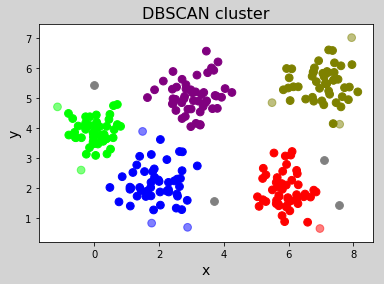

In [19]:
"""
dbscan算法
"""
import numpy as np
import sklearn.cluster as sc
import sklearn.metrics as sm
import matplotlib.pyplot as mp

x = np.loadtxt('../ml_data/perf.txt', 
		       delimiter=',')

# 准备训练模型相关数据
epsilons, scores, models = \
	np.linspace(0.3, 1.2, 10), [], []
# 遍历所有的半径, 训练模型, 查看得分
for epsilon in epsilons:
	model=sc.DBSCAN(eps=epsilon,min_samples=5)
	model.fit(x)
	score=sm.silhouette_score(x, model.labels_, 
		sample_size=len(x), metric='euclidean')
	scores.append(score)
	models.append(model)
# 转成ndarray数组
scores = np.array(scores)
best_i = scores.argmax() # 最优分数的索引
best_eps = epsilons[best_i]
best_sco = scores[best_i]
print(best_eps)
print(best_sco)
# 获取最优模型
best_model = models[best_i]

# 对输入x进行预测得到预测类别
pred_y = best_model.fit_predict(x)

# 获取孤立样本, 外周样本, 核心样本
core_mask = np.zeros(len(x), dtype=bool)
# 获取核心样本的索引, 把对应位置的元素改为True
core_mask[best_model.core_sample_indices_]=True
# 孤立样本的类别标签为-1
offset_mask = best_model.labels_ == -1
# 外周样本掩码 (不是核心也不是孤立样本)
p_mask = ~(core_mask | offset_mask)

# 绘制这些样本数据
mp.figure('DBSCAN cluster', facecolor='lightgray')
mp.title('DBSCAN cluster', fontsize=16)
mp.xlabel('x', fontsize=14)
mp.ylabel('y', fontsize=14)
mp.tick_params(labelsize=10)
# 绘制核心样本
mp.scatter(x[core_mask][:,0], x[core_mask][:,1],
	s=60, cmap='brg', c=pred_y[core_mask])
# 绘制外周样本
mp.scatter(x[p_mask][:,0], x[p_mask][:,1],
	s=60, cmap='brg', c=pred_y[p_mask], 
	alpha=0.5)
# 绘制孤立样本
mp.scatter(x[offset_mask][:,0], 
	x[offset_mask][:,1], s=60, c='gray')

mp.show()

#### 推荐引擎

目的: 把用户最需要的内容找到并推荐给用户.

针对不用的业务需求, 一般情况下推荐流程:

1. 根据当前用户信息, 寻找相似用户
2. 根据相似用户的行为, 选择推荐内容.
3. 对推荐内容进行重要性排序, 最终推荐给用户.

In [1]:
"""
推荐引擎
"""
import json
import numpy as np
'''
1. 读取json文件, 遍历每一个用户, 计算当前
   用户与其他用户的相似度(欧式距离得分)
2. 把每个相似度得分,存入scmat矩阵.供以后使用
'''
with open('../ml_data/ratings.json', 'r')as f:
	ratings = json.loads(f.read())

users, scmat = list(ratings.keys()), []
for user1 in users:
	scrow = [] # 存储user1与其他人的相似度得分
	for user2 in users:
		movies = set()
		# user1看过的user2也看过
		for movie in ratings[user1]:
			if movie in ratings[user2]:
				movies.add(movie)
		# 两人没有共同语言
		if len(movies) == 0:
			score = 0
		else:  # 两人有都看过的电影
			x, y = [], []
			for movie in movies:
				x.append(ratings[user1][movie])
				y.append(ratings[user2][movie])
			x = np.array(x)
			y = np.array(y)
			#score = 1/(1+np.sqrt(((x-y)**2).sum()))
			score = np.corrcoef(x,y)[0,1]
		scrow.append(score)
	scmat.append(scrow)

users = np.array(users)
scmat = np.array(scmat)
# 输出每个用户的相关系数得分矩阵
for scrow in scmat:
	print('  '.join(
	'{:.2f}'.format(score) for score in scrow))

# 按照相关系数从高到低排列每个用户的相似度
for i, user in enumerate(users):
	sorted_indices = scmat[i].argsort()[::-1]
	# 忽视当前user
	sorted_indices = \
		sorted_indices[sorted_indices!=i]
	# 获取相似用户数组
	similar_users = users[sorted_indices]
	# 获取每个相似用户的相似度得分
	similar_scores = scmat[i, sorted_indices]
	#print(user, similar_users, similar_scores,
	#	sep='\n')

	# 生成推荐清单
	# 找到所有正相关用户即相关性分数
	positive_mask=similar_scores > 0
	similar_users=similar_users[positive_mask]
	similar_scores=similar_scores[positive_mask]
	# 存储对当前用户的推荐的电影
	# recomm_movies = {'电影名':[0.5, 0.4, 0.3]}
	recomm_movies = {}
	for i, similar_user in \
				enumerate(similar_users):
		# 拿到相似用户看过, 但user没看过的电影
		for movie, score in \
				ratings[similar_user].items():
			if movie not in ratings[user].keys():
				if movie not in recomm_movies:
					recomm_movies[movie]=[score]
				else:
					recomm_movies[movie].append(score)

	print(user)
	#print(recomm_movies)
	movie_list = sorted(recomm_movies.items(), 
		key=lambda x:np.average(x[1]), 
		reverse=True)
	print(movie_list)

1.00  0.40  0.40  0.57  0.59  0.75  0.99
0.40  1.00  0.20  0.31  0.41  0.96  0.38
0.40  0.20  1.00  1.00  -0.26  0.13  -1.00
0.57  0.31  1.00  1.00  0.57  0.03  0.89
0.59  0.41  -0.26  0.57  1.00  0.21  0.92
0.75  0.96  0.13  0.03  0.21  1.00  0.66
0.99  0.38  -1.00  0.89  0.92  0.66  1.00
John Carson
[]
Michelle Peterson
[]
William Reynolds
[('Serendipity', [2.5, 2.5, 3.5, 3.5]), ('Anger Management', [3.0, 3.0, 1.5])]
Jillian Hobart
[('Inception', [2.5, 3.0, 2.5, 3.0, 3.0])]
Melissa Jones
[]
Alex Roberts
[('Anger Management', [1.5, 3.0, 2.0, 3.0])]
Michael Henry
[('Jerry Maguire', [3.0, 3.0, 4.5, 3.0, 3.0]), ('Inception', [2.5, 3.0, 3.0, 3.0]), ('Anger Management', [3.0, 2.0, 3.0, 1.5])]


### 自然语言处理(NLP)

Siri工作流程: 1. 听  2. 懂  3.思考  4. 组织语言  5.回答

1. 语音识别
2. 自然语言处理 - 语义分析
3. 业务逻辑分析 - 结合场景 上下文
4. 自然语言处理 - 分析结果生成自然语言文本
5. 语音合成

#### 自然语言处理

自然语言处理的常用处理过程:

先针对训练文本进行分词处理(词干提取, 原型提取), 统计词频, 通过词频-逆文档频率算法获得该词对整个样本语义的贡献, 根据每个词对语义的贡献力度, 构建有监督分类学习模型. 把测试样本交给模型处理, 得到测试样本的语义类别.

自然语言处理工具包 - nltk

#### 文本分词

```python
import nltk.tokenize as tk
# 把一段文本拆分句子
sent_list = tk.sent_tokenize(text)
# 把一句话拆分单词
word_list = tk.word_tokenize(sent)
# 通过文字标点分词器 拆分单词
punctTokenizer = tk.WordPunctTokenizer()
word_list = punctTokenizer.tokenize(text)
```


In [1]:
"""
分词器
"""
import nltk
import nltk.tokenize as tk
nltk.download('punkt')
doc = "Are you curious about tokenization? \
	Let's see how it works! \
	We neek to analyze a couple of sentences \
	with punctuations to see it in action."
# print(doc)

sent_list = tk.sent_tokenize(doc)
for i, sent in enumerate(sent_list):
	print('%2d' % (i+1), sent) 

word_list = tk.word_tokenize(doc)
for i, word in enumerate(word_list):
	print('%2d' % (i+1), word) 

tokenizer = tk.WordPunctTokenizer()
word_list = tokenizer.tokenize(doc)
for i, word in enumerate(word_list):
	print('%2d' % (i+1), word) 


 1 Are you curious about tokenization?
 2 Let's see how it works!
 3 We neek to analyze a couple of sentences 	with punctuations to see it in action.
 1 Are
 2 you
 3 curious
 4 about
 5 tokenization
 6 ?
 7 Let
 8 's
 9 see
10 how
11 it
12 works
13 !
14 We
15 neek
16 to
17 analyze
18 a
19 couple
20 of
21 sentences
22 with
23 punctuations
24 to
25 see
26 it
27 in
28 action
29 .
 1 Are
 2 you
 3 curious
 4 about
 5 tokenization
 6 ?
 7 Let
 8 '
 9 s
10 see
11 how
12 it
13 works
14 !
15 We
16 neek
17 to
18 analyze
19 a
20 couple
21 of
22 sentences
23 with
24 punctuations
25 to
26 see
27 it
28 in
29 action
30 .


[nltk_data] Downloading package punkt to /home/liyuan3970/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
"""
词干提取器 
"""
import nltk.stem.porter as pt
import nltk.stem.lancaster as lc
import nltk.stem.snowball as sb

words = ['table', 'probably', 'wolves', 
	'playing', 'is', 'the', 'beaches', 
	'grouded', 'dreamt', 'envision']

pt_stemmer = pt.PorterStemmer()
lc_stemmer = lc.LancasterStemmer()
sb_stemmer = sb.SnowballStemmer('english')

for word in words:
	pt_stem = pt_stemmer.stem(word)
	lc_stem = lc_stemmer.stem(word)
	sb_stem = sb_stemmer.stem(word)
	print('%8s %8s %8s %8s' % \
		  (word, pt_stem, lc_stem, sb_stem))


   table     tabl     tabl     tabl
probably  probabl     prob  probabl
  wolves     wolv     wolv     wolv
 playing     play     play     play
      is       is       is       is
     the      the      the      the
 beaches    beach    beach    beach
 grouded    groud    groud    groud
  dreamt   dreamt   dreamt   dreamt
envision    envis    envid    envis


In [ ]:
"""
词性还原
"""
import nltk.stem as ns

words = ['table', 'probably', 'wolves', 
	'playing', 'is', 'the', 'beaches', 
	'grouded', 'dreamt', 'envision']

lemmatizer = ns.WordNetLemmatizer()
for word in words:
	n_lemm = lemmatizer.lemmatize(word,pos='n')
	v_lemm = lemmatizer.lemmatize(word,pos='v')
	print('%8s %8s %8s' % \
		  (word, n_lemm, v_lemm))

In [ ]:
"""
词袋模型 bag of word
"""
import sklearn.feature_extraction.text as ft
import nltk.tokenize as tk

doc = 'The brown dog is running. \
	The black dog is in the black room. \
	Running in the room is forbidden.'
# 拆分句子
sents = tk.sent_tokenize(doc)
print(sents)
# 构建词袋模型
model = ft.CountVectorizer()
bow = model.fit_transform(sents)
print(bow.toarray())
print(model.get_feature_names())


